<a href="https://colab.research.google.com/github/20230670/konlpy/blob/main/token.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy
!apt-get update -qq
!apt-get install fonts-nanum* -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 24.8 MB/s eta 0:00:00
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ..

In [2]:
from konlpy.tag import Okt

okt = Okt()



In [3]:
# 정규화

text = "안녕하세욬ㅋㅋ"
normalize = okt.normalize(text)
print(normalize)

안녕하세요ㅋㅋ


In [4]:
# 형태소 분석

text1 = "좋은 인간이 되는 것과 좋은 시민이 되는 것이 항상 같은 것은 아니다."

morphs = okt.morphs(text1)
print(morphs)


['좋은', '인간', '이', '되는', '것', '과', '좋은', '시민', '이', '되는', '것', '이', '항상', '같은', '것', '은', '아니다', '.']


In [5]:
# 명사만 추출

nouns = okt.nouns(text1)
print(nouns)

# 불용어 처리
from collections import Counter

stopwords = ['것']
result = [x for x in nouns if x not in stopwords and len(x) > 1]
print(result)

c = Counter(result)
print(c.most_common(10))

['인간', '것', '시민', '것', '항상', '것']
['인간', '시민', '항상']
[('인간', 1), ('시민', 1), ('항상', 1)]


In [6]:
#단어별 빈도 count
from collections import Counter

news = """방송통신위원회(위원장 이동관, 이하 방통위)가 가짜뉴스 근절과 신속 피해구제를 위한 신속심의·구제제도 (패스트트랙)활성화, 가짜뉴스에 대한 실효성 있는 제재 도입, 사실상 언론으로서 막대한 영향력을 행사하는 포털 사업자의 사회적 책임 강화 등 대응에 나서기로 했다.

방통위는 18일 경기도 과천시 정부 과천청사 방통위에서 열린 전체회의에서 이같은 내용의 ‘가짜뉴스 근절 추진방안’을 발표했다.

이번 대책 마련을 위해 방통위는 지난 6일부터 가짜뉴스 근절 태스크포스(TF)를 가동하고, 13일 방송통신심의위원회가 협력 기관으로 참석한 회의에서 세부 방안을 논의했다.

TF는 일단 방심위에 가짜뉴스 신고 창구를 마련하고, 접수 순서와 상관없이 신속심의와 후속 구제조치를 원스톱으로 처리하는 방안을 활성화하기로 했다.

이를 위해 방심위 방송소위가 종전 주 1회 회의에서 주 2회 회의로 확대되고, 24시간 이내 전자심의 등을 위한 입법이 추진될 전망이다.

또 가짜뉴스 신고 접수 및 신속 심의 상황을 주요 포털 사업자와 공유해 긴급 재난상황이나, 금융시장의 심각한 혼란 유발, 선거 결과에 영향, 중대한 공익의 침해 등 긴급하게 필요한 경우 사업자의 선제적 조치를 요청하는 등 자율규제를 우선 추진한다.

방송사에 대한 재허가?재승인 심사의 객관성 제고를 위해 심사평가를 계량평가 중심으로 전환하고, 허가·승인 유효기간을 5년에서 7년으로 확대하는 방안을 추진하기로 했다.

하지만 긴급하고 심각한 위반행위가 있는 경우에는 유효기간을 현행 최단 3년보다 축소하는 등 실효적이고 탄력적인 제재 방안도 검토한다.

네이버와 다음카카오 등 주요 인터넷 사업자들은 방통위의 가짜뉴스 근절 대책에 협조하고 지속적으로 협의해 나가기로 했다."""
noun = okt.nouns(news)
count = Counter(result)

# 불용어 처리
from collections import Counter
stopwords = ['이','등','를','또','및','재']
result = [x for x in count if x not in stopwords and len(x) > 1]



# 명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
	print(v)







('인간', 1)
('시민', 1)
('항상', 1)


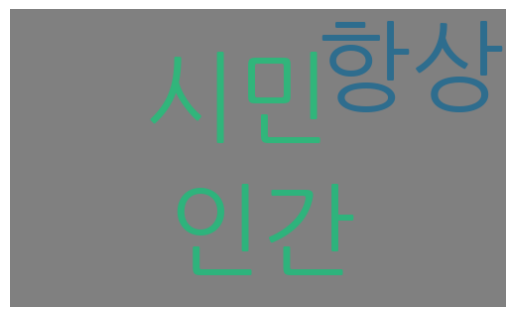

In [7]:
from wordcloud.wordcloud import FONT_PATH
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

text = " ".join(result)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=55,
    background_color= 'gray',
    relative_scaling=.5,
    width = 500,
    height = 300,
    font_path=FONT_PATH).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()